In [1]:
# Module_1 Feature Engineering Assignment:

In [72]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, PolynomialFeatures, OrdinalEncoder
import matplotlib.pyplot as plt
# !pip install tensorflow
import tensorflow as tf

In [58]:

'''
# Q1.What is a parameter?
Answer:
    A parameter is a numerical value that summarizes a characteristic of a population in statistics or a function
    in programming.
    It is fixed for the given context.
Example:
    In Statistics:
        if we study the average height of all adults in a city, the parameter is the true mean height of the population
        '''
population_height = []
random.seed(1)
for i in range(7):
    rand = random.randint(159, 170)
    population_height.append(rand)
print(population_height)

population_height_mean = np.mean(population_height)
print(f"Mean height of the population is: {round(population_height_mean, 2)}")
print()
'''
    In Programming:
        In a function like eg:def greet(name), name is the parameter that takes a value when the function is called.

'''
# Using a Parameter in Programming
def greet(name):
    print( f"Hello ",name)

greet("Asad")
greet("Ahmed")
'''
Insights:
    1.In statistics, parameter describe population values, which are usually unknown and estimated through samples
    
    2.In programming, parameters make function flexible and reusable with different inputs.
    '''
print()

[161, 168, 160, 163, 160, 166, 166]
Mean height of the population is: 163.43

Hello  Asad
Hello  Ahmed



In [59]:
'''
Q2.What is correlation?
What does negative correlation mean?
Answer:
    Correlation measures the strength and direction of the relationship between two variables, it tells us 
    how changes in one variable are associated with changes in another.

Key_Points:
    1.Value Range:
        Correlation coefficients range from -1 to +1
        Where:
            -1 is for Perfect negative correlation(as one variable increases, the other decreases).
    2.Types of Correlation:
        1.Negative correlation : variables move in opposite directions
    3. Usage:
        Correlation helps in understanding relationships and is often a precursor to regression analysis.
Example:
'''
data = {
    "Study Hours":[1, 2, 3, 4, 5],
    "Marks":[50, 45, 40 ,35, 30]
}
df = pd.DataFrame(data)
corr = df["Study Hours"].corr(df['Marks'])
print("Correlation between Study hours and Marks is :", corr)


corr = df[["Study Hours", "Marks"]].corr() #made a matric for me to visualize the correlation

"""
Insights:
    The Negative correlation(1.0) indicates a perfect Negative relation where more study hours lead to lower marks in the exams 
    # It was just and example, This example is just used to demonstrate the negative correlation, in real life it would not be a case.
"""
print()


Correlation between Study hours and Marks is : -1.0



In [60]:
'''
Q3.What is Machine learning, What are the main components in Machine Learning.
Answer :
    Machine Learning (ML) is a subset of artificial intelligence that enables systems to lear and improve from
    experience without being explicitly programmes.
    It uses Algorithms and statistical models to identify patters in the data and make decision or predictions

Main Components in Machine Learning:
    1.Data:
        1.Data is the foundation of ML, consisting of training and testing datsets.
        2.Types of data: structured, unstructured or semi-structured.
        Example:
            Customer purchase history, medical records, sensor data.
    2.Model:
        1.A mathematical representation of a problem based on the data.
        2.It defines the algorithm or logic used to process inputs and generate outputs.
        Example:
            Leaner Regression model, Decision Tree
    3.Algorithm:
        1.The method or procedure is used to train the model
        Examples:
         Including supervised learning algorithms(Logistics Regression), 
            unsupervised learning algorithms(K-means) and reinforcement learning
    4.Features:
        1.Features are the measurable properties or attributes of the data used for training.
        2.Feature engineering involves selecting, transform or creating these attributes for better model performance
        Example:
            Age , income and eduction level in predicting loan approval
    5.Training:
        1.The process of feeding data into the model so it learns patters and relationship.
        2.Required splitting data into training and testing datasets for validation.
    6.Evaluation:
        Assessing the model's accuracy and performance using metrics like accuracy, precision, recall or F1-score
    7.Prediction:
        The model generates outcomes or decision based on new unseen data
        Example:
            Predicting whether an email is spam or not
Example:
'''
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target_variable'] = diabetes.target

# Train_test_split
X = df.drop('target_variable', axis=1)
y = df['target_variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Model Training with LinearRegression machine learning model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)#This will give 10 coffecient because it has 10 columns and intercept_
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(f"Coefficients for each features are\n{model.coef_}")
print()
print(f"interception is\n{model.intercept_}")

# Testing the model
y_pred = model.predict(X_test)

# performance Evaluation
from sklearn.metrics import mean_squared_error
print("Mean squared error is:",mean_squared_error(y_test, y_pred))
'''
Insights:
    Machine learning bridges the gap between data and actionable insights, its main components data, model,
    algorithms and evaluation work together to enable systems to make informed predictions, ensuring adaptability in various fields like healthcare ,finance and technology
    
    '''
print()


Coefficients for each features are
[  -7.85976574 -245.0498378   575.12383646  323.84954344 -519.78903584
  250.62690777    0.96998187  180.50547491  614.76359069   52.10566318]

interception is
150.9977582372867
Mean squared error is: 2903.1267340166614



In [61]:
'''
Q4.How does the loss value help in determining whether the model is good or not?
Answer:
    The loss value is a measure of how well or poorly a machine learning model performs on a given dataset.
    It quantifies the difference between the model's predictions and the actual target values.
    A lower the loss value generally indicates a better model, while a high loss suggests the need for improvement

How loss value helps determine model performance:
    1.Indicates Model Accuracy:
        1.A small loss value means the model's predictions are close to the true value.
        2.Conversely, a large loss value signals poor prediction accuracy.
    2.Guides Optimization:
        1.During training, the models updates its parameters to minimize the loss using optimization algorithms like
            Gradient Descent.
        2.Monitoring the loss value helps ensure that the training process is moving in the right direction.
    3.Helps detect overfitting or underfitting:
        1.If the training loss is low but the validation loss is high, the model may be overfitting 
        2.If both losses are high, the model might be underfitting.
    4.Facilitates Model comparison:
        1.Comparing the loss values of different models or hyperparameter settings helps select the best 
        performing model.
Example:
'''

x = np.arange(1, 11).reshape(-1, 1)
y = np.array([3.3, 5.6, 4.1, 8.5, 10.1, 7.4, 6.8, 9.1, 6.3, 8.7])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

loss = mean_squared_error(y_test, y_pred)


print(f"Loss Value (Mean Squared Error) is: {loss}")


'''
Insights:
    1.A loss values close to zero indicates a well_trained model.
    2.Regular Evaluation of loss on both training and validation datasets ensures the model is not overfitting 
        or underfitting.
    By monitoring and minimizing the loss value, machine learning practitioners ensure that their models perform 
        efficiently and generalize well to unseen data      
    '''
print()


Loss Value (Mean Squared Error) is: 2.436373366609852



In [62]:
'''
Q5.What are continuous and categorical variables?
Answer:
    1.Continuous Variables:
        These are the variables than can take any value within a range and are measured on a continuous scale.
            They are often associated with quantitative data
        1.Characteristics of Continuous Variables:
            1.Infinite possible values within a range.
            2.Typically numeric.
            3.Can be measure in weight, temperature .
        2.Key usage:
            1.Used in regression analysis.
            2.Helps understand trends, average or distributions

    2.Categorical Variables:
        These are variables that represents distinct categories or groups.
            They are often associated with qualitative data
        1.Characteristics of Categorical Variable:
            1.Finite set of values.
            2.Typically non-numeric (though can represent categories, like 1 for male nad 2 for female
            3.Cannot be measured but can be counted or classified.
        2.Types of categorical variables:
            1.Nominal: Categories without a specific order(eg: color)
            2.ordinal: Categories with a meaningful order (eg: rating)
    Example:
'''
data = {
    "Age": [25, 30, 35, 40], #continuous variable
    "Gender":["Male", "Female" ,"Male", "Female"]
}
df = pd.DataFrame(data)

print(f'{"Age"} is a Continuous variable.')
print(df["Age"].describe())
print()
print(f'{"Gender"} is a Categorical variable.')
print(df["Gender"].value_counts())
'''
Insights:
    1.Continuous Variables are useful for measuring analyzing data trends.        
    2.Categorical Variables help group data and create classification.    
    3.Both are crucial in different statistical methods and machine learning models.
        '''
print()

Age is a Continuous variable.
count     4.000000
mean     32.500000
std       6.454972
min      25.000000
25%      28.750000
50%      32.500000
75%      36.250000
max      40.000000
Name: Age, dtype: float64

Gender is a Categorical variable.
Gender
Male      2
Female    2
Name: count, dtype: int64



In [63]:
'''
Q6.How to we handle categorical variables in Machine Learning? What are the common techniques?
Answer:
    Handling categorical variables in Machine learning is crucial as many algorithms require numerical inputs.
    Common techniques for processing categorical variables are as following:
    
1.Encoding Techniques:
    These methods convert categorical data into numerical formats that algorithms can interpret.
    1.One-Hot Encoding:
        1.Converts categorical into binary columns (1 for presence, 0 for absence).
        2.Suitable for nominal(unordered) data
    Example:
'''
encoded_Gender = pd.get_dummies(df.Gender, columns = ['Gender'])
print("OHE Encoding\n",encoded_Gender)
'''
2.Label Encoding:
    1.Assigns a unique integer to each category.
    2.Suitable for ordinal (ordered ) data.
Example:
'''
print()
sizes = ["small", "Medium", "Large"]
encoder = LabelEncoder()
encoder_sizes = encoder.fit_transform(sizes)
print(f"using Label Encoding\n{sizes} into Encoded sizes{encoder_sizes}")

'''from sklearn.preprocessing import LabelEncoder

3.Target Encoding:
    1.Maps categories to the mean of the target variable.
    2.Useful in reducing dimensionality while preserving relationships.
Example:

Insights:
    1.Tree-based Models is Flexible with label encoding since they split data based on thresholds, not magnitudes
    2.For high Cardinality use target or frequency encoding to handle large numbers of unique categories.
    3.For interpretability: One-Hot encoding to handle large numbers of unique categories
    This condensed version keeps only the most critical techniques and advice, focusing on practical applications and
    avoiding overloading.
    '''

print()

OHE Encoding
    Female   Male
0   False   True
1    True  False
2   False   True
3    True  False

using Label Encoding
['small', 'Medium', 'Large'] into Encoded sizes[2 1 0]



In [64]:
'''
Q7.What do you mean by training and testing a dataset
Answer:
    In machine learning training and testing are crucial steps in building and evaluating a model.
        They ensure that the model learns patterns from the data and can generalize well to unseen data.
1.Training a Dataset:
    1.The training dataset is the portion of data used to train the machine learning model
    2.The model learns patterns, relationships and rules from this data
    3.Algorithms optimize parameters(eg:weights in neural networks) based on the training data
Example:
    If you want to predict house prices you train it using a dataset of houses with features like size, location and
        price

2.Testing a Dataset:
    1.The testing dataset is a separate, unseen portion of data used to evaluate the model.
    2.It measures how well the model generalizes to new data (the data which machine is seeing for the first time)
    3.Testing helps assess the model's accuracy, reliability and ability to avoid overfitting
Example:
    After training the model on historical house data, you test it on another set of houses to see if it 
        predicts prices accurately

Code_Example:
'''
X = np.arange(1, 11).reshape(-1, 1)
# X = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90 ,95]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
print("Mean Square Error:", mean_squared_error(y_test, y_pred_test))
print('R Square score is :',r2_score(y_test, y_pred_test))
'''
Insights:
    1.if a model performs well on train data but poorly on test data, it may be overfitting.
    2.Cross_validation uses techniques like k fold cross-validation to further endure robustness.
    3.Real_World uses in prediction, models are evaluated on testing data to simulate real-world performance.
    This approach balances simplicity and depth, making the concepts practical and easy ti grasp.
    '''
print()

Mean Square Error: 12.5
R Square score is : 0.9881656804733728



In [65]:
'''
Q8What is sklearn.preprocessing?
Answer:
    sklearn.preprocessing is a module in scikit-learn that provides tools to preprocess and transform raw data 
        before feeling it into machine learning models.
    It ensures that the data is formatted, scaled and normalized making it suitable for model training and testing.
    Proper preprocessing can significantly improved model performance and convergence.
    
Key Techniques in scikit-learn
    1.Scaling and Normalization:
        Purpose to ensure all feature have comparable scales, especially when using distance-based algorithms like
            K-NN or SVM.
        Methods:
            1.MinMaxScaler scales data to a range (for eg: 0 to 1)
            2.StandardScaler standardized data by removing the mean and scaling to unit variance
    2.Encoding Categorical Variables:
        Purpose:
            Converts categorical data into numerical format for compatibility with machine learning algorithms.
        Methods:
            1.LabelEncoding converts categorical labels into numeric codes
            2.OneHotEncoder encodes categories as binary vectors
    3..Generating Polynomial Features:
        Purpose:
            Add polynomial terms (for eg xsquare, x1, x2) to capture non linear relationships between features.
        Method:
            PolynomialFeatures
    4.Binarization:
        Purpose:
            Converts numerical data into binary(0 and 1) based on the threshold.
        Method: 
            Binarizer
    Code_Example:   
'''
# Scaling and Normalization of numeric column
data = [[100, 160], [250, 310],[355, 415],[710, 770]]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

# Encoding Categorical Data
categories = ["red", "green", "blue", "brown"]
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(categories)
print(f"Encoded labels of{categories} is {encoded_labels}")

# Generating Polynomial Features
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform([[1, 2]])
print("PolynomialFeatureEncoding:", poly_features)

'''
Insights: 
    1.When to use klearn.preprocessing:
        1.When features in the dataset have different scales or distributions.
        2.When categorical data need to be converted into numerical format.
        3.When no-linear relationship need to be captures using polynomial terms
    2.Features like age and income might have vastly different ranges without scaling , the model mya overemphasize one
        feature, algorithms like Logistics Regression standardized for optimal performance.

'''
print()

[[0.         0.        ]
 [0.24590164 0.24590164]
 [0.41803279 0.41803279]
 [1.         1.        ]]
Encoded labels of['red', 'green', 'blue', 'brown'] is [3 2 0 1]
PolynomialFeatureEncoding: [[1. 1. 2. 1. 2. 4.]]



In [66]:
'''
Q9.What is a test set
Answer:
    A test set is a subset of the dataset used to evaluate the performance of a trained machine learning model.
        It acts as a benchmark to assess how well the model generalizes to unseen data. 
    The test set should ideally be separate from the data used for training and validation to ensure unbiased 
        evaluation.

Purpose of a Test Set:
    1.Evaluation Generalization:
        It measures how the model performs in unseen data, ensuring the model does not just memorize the 
        training data.
    2.Model Validation: 
        Helps confirm if the model is overfitting (performing well on training data but poorly on new data).
    3.Real-World Simulation:
        Provides an estimate of the model's performance in real-world scenarios.
    Code Example:    
'''
X = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ] # shows the patter to X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print("Training dataa:",X_train)
print("Test data:",X_test)
'''
1.How to use the TestSet:
    1.Training the model on the training set
    2.fine-tune hyperparameters on the validation set
    3.Finally, evaluate the model's performance on the test set.
2.Importance of Separation:
    1.The test set should never influence models training or hyperparameter tuning to avoid data leakage and ensure 
    unbiased results
3.Real_World:
    Considering a model predicting load defaults, if the test set contains data about borrowers the model has already 
        seen, its performance might appear inflated.
    A proper test set ensures that the model's accuracy reflects its realworld application
'''
print()

Training dataa: [[1], [4], [2], [8], [9], [6]]
Test data: [[3], [10], [7], [5]]



In [67]:

'''
Q10.1.How do we split data for model fitting (training and testing) in Python?
Answer:
    Splitting data into training and testing sets is a crucial step in building machine learning models to ensure
    unbiased evaluation of the model's performance.
    
Steps to Split data
    1.Training Set:
        Used to train the model by learning patterns form the data.
    2.Testing Set:
        Used to evaluated how well the model performs on unseen data.
    3.Validation Set:
        If tuning hyperparameters, a validation set may be used to avoid overfitting.
    Example:
'''
X = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [False, True, False, True, False, True, False, True, False, True ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=1)
print("Training Features:\n", X_train)
print("Training Labels:\n", y_train)
print("Test Features:\n", X_test)
print("Test Labels:\n", y_test)

'''
Q10.2.How do you approach a Machine Learning problem?

Approach to a Machine Learning problem:
    1. Understand the problem:
        1.Define the objective (eg: classification, regression)
        2.Identify the target variable features.
    2.Data Collection:
        1.Gather relevant data from sources(eg: file.csv, databases, api's)
    3.Data Processing:
        1.Handle missing values, outliers and inconsistencies.
        2.Normalize or scale numerical features.
        3.Encode categorical variables(eg: one-hot-encoding)
    4.Exploratory Data Analysis (EDA)
        1.Analyze data distribution, relationships, and trends.
        2.Visualize patterns using tools like matplotlib or seaborn
    5.Split the Dataset:
        1.Use train test split to divide data into training and testng sets.
        2.Optionally, split further into a validation set.
    6.Model Selection:
        1.choose an appropriate algorithm based on the problem(eg: decision tree, svm, neutral network).
    7.Train the Model:
        1.Fit the model using the train set.
    8.Validate and Tune hyperparameters:
        1.Use cross_validation or a validation set to optimize the model.
    9.Evaluate the model:
        1.Evaluate on the testing set using metrics like accuracy, precision, recall, or RMSE.
    10.Deploy and Monitor:
        1.Deploy the model to a production environment.
        2.Continuous monitor its performance and retain if necessary.
    
    Example:
'''
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
accuracy = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error is:{accuracy}")
print('R_Square is:',r2_score(y_test, y_pred_test))
'''
Insights:
    1.Why slit data?
        1.To evaluate the model's generalization on unseen data.
        2.Prevent overfitting by not testing on training data
    2.Best Practice:
        1.Use stratified splitting for imbalanced datasets.
        2.Set random_state for reproducibility.
    3.Practical Application:
        1.For a spam filter, split email datasets into
    
    '''
print()

Training Features:
 [[1], [4], [2], [8], [9], [6]]
Training Labels:
 [False, True, True, True, False, True]
Test Features:
 [[3], [10], [7], [5]]
Test Labels:
 [False, True, False, False]
Mean Squared Error is:2992.5812293010163
R_Square is: 0.43843162133692803



Summary Statistics: 
             Age        Salary
count   4.000000      5.000000
mean   32.500000  53800.000000
std     6.454972  27426.264784
min    25.000000   9000.000000
25%    28.750000  50000.000000
50%    32.500000  60000.000000
75%    36.250000  70000.000000
max    40.000000  80000.000000

Missing values in the dataset are: 
Age       1
Salary    0
dtype: int64


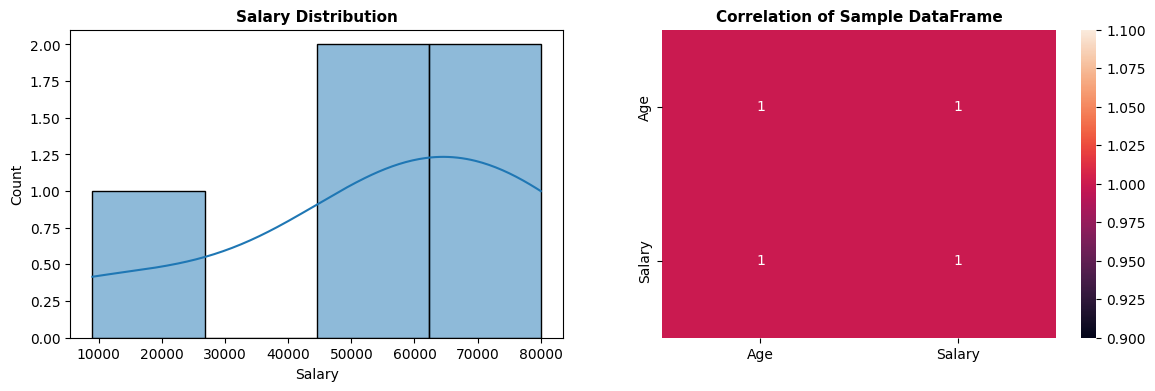

In [68]:
'''
Q11.Why do we have to perform EDA before fitting a model to the data?
Answer:
    Exploratory data Analysis (EDA) is crucial set before fitting a machine learning model.
    It helps understand the dataset, identify patterns and detect issues that can affect model performance.
    Why EDA is necessary are as following:
1.Understand the Dataset:
    1.Purpose:
        To Gain insights into the structure and content of the data.
    2.Key Tasks:
        1.Identify the features (columns) and their types(numerical, categorical,etc)
        2.Understand the target variable (distribution and classes).
        3.Summarize data using descriptive statistics (mean, median, mode , etc)
2.Detect and handle Missing values:
    1.Purpose:
        Models can fail or provide inaccurate results if missing values are not handled
    2.key Tasks:
        1.Identify missing values using visualization or summary statistics.
        2.Impute missing data or drop rows/columns as  appropriate.
3.Detect outliers:
    1.purpose:    
        Outliers can skew results, especially in regression models.
    3.Key Tasks:
        1.Identify outliers using boxplot or statistical methods(eg: Z_score).
        2.Decide whether ti remove, cap or transform outliers.
4.Understand Data Distribution:
    1.Purpose:
        To ensure data is in a format suitable for model training/
    2.Key_tasks:
        1.Visualize distribution using histogram or density plots.
        2.Transform skewed data (eg:logarithmic or square root transformation)
5.Identify Features Relationship:
    1.Purpose:
        To determine how features correlation with each other and the target variable.
    2.Key Tasks:
        1.Use correlation heatmaps to assess multi collinearity.
        2.Performs pairwise scatter plots for feature target relationship.
6.Feature Engineering:  
    1.Purpose:
        Create or modify features to improve model performance.
    2.Key Tasks:
        1.Combine, split or scale features.
        2.Encode categorical variable.
7.Detect Data Quality Issue:
    1.Purpose:
        To ensure data intergrity for accurate predictions.
    2.Key Tasks:
        1.Identify deplicate rows.
        2.check for inconsistent or invalid value (eg: negative age)
8.Choose the Right model and preprocessing steps.
    1.Purpose:
        Tailor Preprocessing and model selection based on the nature of the data.
    2.Key_Tasks:
        1.Decides whether scaling or normalization is required.
        2.Determine if the data needs specific algorithms (eg:linerRegression vs Tree based models)
Example:
'''
data = {
    "Age":[25, 30, 35, 40, None],
    "Salary":[50000, 60000, 70000, 80000, 9000]
}
df = pd.DataFrame(data)
print(f"Summary Statistics: \n{df.describe()}")
print()
print(f"Missing values in the dataset are: \n{df.isnull().sum()}")

# Visualizing the using plot
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df.Salary, kde=True)
plt.title("Salary Distribution", fontweight="bold", fontsize=11)

plt.subplot(1 ,2 ,2)
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation of Sample DataFrame", fontweight="bold", fontsize=11)

'''
Insights:
    Performing EDA is essential for identifying and addressing issues that could negatively impact the model.
    It ensures the dataset is clean, structures and ready for model training, leading to more accurate and reliable 
    predictions.
    
    '''

plt.show()


Correlation of Area of a House and its Price is : 1.0


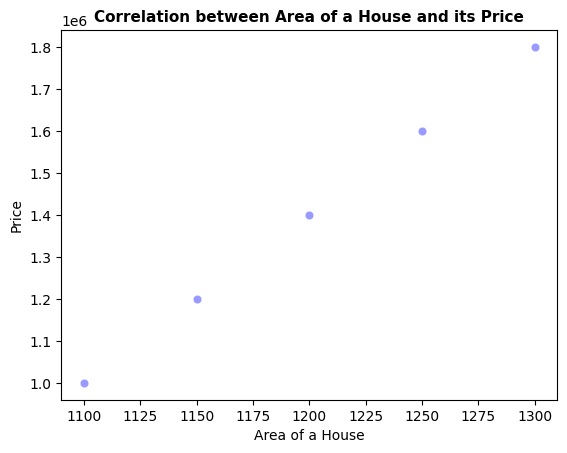

In [15]:
'''
Q12.What is correlation?
Answer:
    Correlation is a statistical measure that describes the degree to which two variables move in relation to 
        each other.
    It quantifies the strength and direction of a linear relationship between two variables
1.Key_Points of Correlation
    Correlation values range from -1 to 1:
    1. +1:Perfect positive correlation (both variables increase together).
    2. 0: No Correlation(variables are independent)
    3. -1: Perfect Negative Correlation(one variable increases, the other decreases)
2.Types of correlation:
    1.In positive correlation, both variables move in the same direction.
    2.In Negative Correlation, Variables move in opposite direction.
    3.In No Correlation, No linear relationship exists between variables.
3.Uses:
    1.Determine relationship between variables(eg: height and weight).
    2.Feature selection in machine learning (find relevant predictors).
Example:
'''
data = {
    "Area of a House":[1100, 1150, 1200, 1250, 1300],
    "Price": [1000000, 1200000, 1400000, 1600000, 1800000]
}
df = pd.DataFrame(data)

corr = df["Area of a House"].corr(df['Price'])
print("Correlation of Area of a House and its Price is :",corr)

# visualization
sns.scatterplot(x="Area of a House", y="Price", data=df, marker= "o", color ="blue",alpha=0.4)
plt.title("Correlation between Area of a House and its Price", fontweight="bold", fontsize=11)

'''
Insights:
    1.Strong Relationship:
        High absolute correlation values(close to -1 or +1) indicate a string relationship.
    2.Predictive Power: 
        Features with high correlation to the target variable are often good predictors in machine learning.
    3.Multi collinearity:
        In regression, highly correlated independent variables can cause multi collinearity, which 
        can distort mode coefficients
    
    '''
plt.show()

   Speed  Distance
0     40        60
1     45        55
2     50        50
3     55        45
4     60        40
Correlation Value is:-1.0


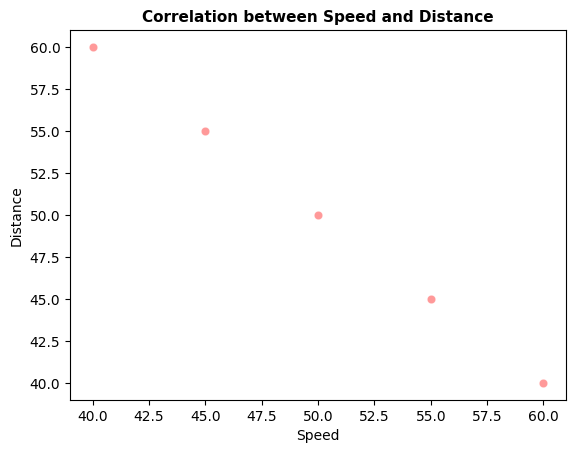

In [16]:
"""
Q13.What does negative correlation mean?
Answer:
    Negative Correlation refers to a relationship between two variables where one variable increases while the 
        other decreases.
    This is represented by correlation coefficient value between -1 and 0
Key characteristics of Negative Correlation:
    1.Value Range:
        1.A correlation of -1 indicates a perfect negative correlation(a consistent inverse relationship)
        2.A value closer to 0 means a weaker negative relation.
    2.Direction of Movement:
        1.When one variable goes up, the other does down and vice versa.
    3.Examples:
        1.As temperature decreases, heater usage increases.
        2.As speeed increases, travel time decreasing (Assuming a fixed distance)
Code_Example:
"""
data = {
    "Speed":[40, 45, 50, 55, 60],
    "Distance":[60, 55, 50, 45, 40]
}
df = pd.DataFrame(data)
print(df)

corr = df["Speed"].corr(df["Distance"])
print(f"Correlation Value is:{corr}")

# visualizing
sns.scatterplot(x="Speed", y="Distance", data=df, color= "red", marker="o", alpha=0.4)
plt.title("Correlation between Speed and Distance", fontweight="bold", fontsize=11)
'''
Insights:
    1.Inverse Relationship:
        Negative Correlation reveals variable that move in opposite directions.
    2.Feature Importance: 
        In machine learning, a strong negative correlation with the target variable may indicate valuable predictors.
    3.Decision Making:
        It helps understand trade off, like balancing speed and accuracy in algorithms
    4.Real World Examples:
        1.Finance: As demand for bonds increases, bon yields typically decrease.
        2.Health: As exercise intensity increases, body fat percentage decrease.
        3.Marketing: As product price increases, customer demand often decreases
    Negative correlation provides insights into inverse relationships, which can guide predictions, optimizations and
    strategic decision in various fields.
    '''
plt.show()

   Variable_a  Variable_b  Variable_c
0          10          50          15
1          20          40          25
2          30          30          35
3          40          20          45
4          50          10          55
Correlation is             Variable_a  Variable_b  Variable_c
Variable_a         1.0        -1.0         1.0
Variable_b        -1.0         1.0        -1.0
Variable_c         1.0        -1.0         1.0


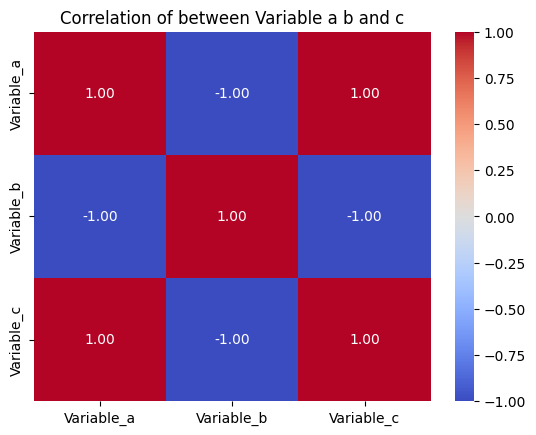

In [17]:
"""
Q14.How can you find correlation between variables in python?
Answer:
    Correlation between variables can be calculated using various methods in Python.
    Correlation coefficients measure the strength and direction of the relationship between two variables.
    Common method include Pearson, Spearman and kendall correlations

Finding correlation between two variables using python: By default it is Pearson correlation matrix method.
""" 
a = [10, 20, 30, 40, 50]
b = [50, 40, 30, 20, 10]
c = [15, 25, 35, 45, 55]
data = {
    "Variable_a": a,
    "Variable_b": b,
    "Variable_c":c
}
df = pd.DataFrame(data)
print(df)
corr = df.corr()
print(f"Correlation is {corr}")

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation of between Variable a b and c")

"""
insights:
    1.Interpretations:
        1.Correlation near 1 or -1 indicates a string relationship.
        2.Near 0 indicates little no relationship
    2.Choosing Methods:
        1.Use pearson for linear relationship.
        2.Use Spearman or kendall for non-linear or ordinal data
    3.Practical Use:
        1.Identify relationship between features before modeling
        2.Features selection in machine learning
    
    Python offers powerful libraries to calculate and interpret correlation.

"""
plt.show()

In [18]:

'''
Q15.What is Causation? Explain difference between correlation and causation with an example.
Answer:
    Causation means that one event directly influence or cause another.
    It implies a cause and effect relationships where changes in one variable results in changes in another.
    For Example: Increasing the temperature of water causes it to boil.
    
1.Difference between Correlation and Causation:
    1.Definition:
        1.Correlation:
            Measures the strength and direction of a relationship between two variables.
        2.Causation:
            Indicates that one variable directly affects another.
    2.Nature:
        1.Correlation:
            Association (related, but no proof of influence).
        2.Causation:
            Cause and effect relationship.
    3.Directionality:
        1.Correlation:
            No implication of direction.
        2.Causation:
            Implies direction cause
    4.Example:
        1.Correlation:
            Ice cream sales increases as temperature rise (correlation).
        2.Causation:
            Higher temperatures causes more ice cream sales(causation)
    5.Testing:
        1.Correlation:
            Statistical methods like correlation coefficients.
        2.Causation:
            Controlled experiments or casual inference.
        
2.Example to Illustrate the difference:
    1.Correlation: Data shows that as the number of firefighters at a scene increases, the damage caused by the
            fire also increases.
        1.Correlation:There is a positive correlation between the number of firefighter and fire damage.
        2.Causation: Larger fires require more firefighters and larger fires naturally cause more damage.
            Firefighters do not cause the damage, they are a response to it.
    2.Causation:A study shows that regular exercise reduces body weight.
        1.Correlation: People who exercise regularly tend to have a lower body weight.
        2.Causation: Controlled experiments confirm that increased exercise directly leads to weight loss.
        '''
data = {
    "Temperature": [30, 32, 35, 37, 40],
    "Ice_Cream_Sales": [200, 250, 300, 350, 400],
    "random_var": [3, 4, 5, 7, 8],
}

df = pd.DataFrame(data)

correlation = df.corr() # correlation matrix
print("Correlation Matrix:\n", correlation)

'''
Insights;
    While correlation can indicate a relationship between two variables, causation established a direct influence.
    It is crucial not to assume causation from correlation alone without further evidence
'''
print()

Correlation Matrix:
                  Temperature  Ice_Cream_Sales  random_var
Temperature         1.000000         0.997609    0.985828
Ice_Cream_Sales     0.997609         1.000000    0.991241
random_var          0.985828         0.991241    1.000000



In [49]:
'''
Q16.What is an Optimizer? What are different types of optimizers? Explain each with an example.
Answer:
    An optimizer is a key component in machine learning that adjusts the weights and biases of a model to minimize
        the loss function.
    It ensures that the mode improves during training by finding the best set of parameters to predict outcomes
        accurately.

Types of Optimizers:
    1.Gradient Descent:
        1.Adjust parameters based on the gradient of the loss function.
        2.Variants:
            1.batch Gradient Descent uses the entire dataset.
            2.Stochastic Gradient Descent updates weights after each training example.
            3.Mini batch Gradient Descent uses small batches of the dataset.
        Code_Example:
'''
model = SGDClassifier(max_iter=5000, tol=1e-4, learning_rate='constant', eta0=0.01)
model.fit(X_train, y_train)
'''
    2.Momentum:
        1.Combines gradients od past steps to smooth updates.
        2.Helps to navigate area with sharp curves efficiently.    
    Code Example:
        '''
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.10, momentum = 0.9)
print("SGDClassifier Optimization", optimizer)
'''
    3.Adagrad:
       1.Adapts leaning rates individually for each parameter.
       2.Good for sparse data but may slow down as leaning progresses.
    Code_Exmaple:    
        '''
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
print("Adagrad Optimization", optimizer)
'''
    4.RMSProp:
        1.Addresses Adagrad's diminishing learning rates issue.
        2.Keeps moving averages of squared gradients for better updates    
    Code Example:
    '''
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01)
print("RMSProp Optimization", optimizer)
'''
    5.Adam (Adaptive Moment Estimation).
        1.Combines Momentum and RMSProp.
        2.Maintains exponentially decaying averages of past gradients and squared gradients.
    Code_Example:
    '''
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
print("Adam Optimization", optimizer)
"""
    6.Nadam (Nesterov accelerated Adaptive Moment Estimation)
        1.Variant of Adam that incorporates Nesterov momentum.
        2.Provides more robust performance in certain scenarios.
    Code_Exmaples:
    """
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
print("Nadam Optimization", optimizer)
'''
Insights:
    1.Choosing the Right Optimizer:
        1.SGD: Simple problem with a large dataset.
        2.Adam: Default choice for most scenarios.
        3.RMSProp: Works well with recurrent neural networks (RNNs)
    2.Trade_off:
        Faster optimizers like Adam may overfit , SGD, while slower, often generalizes better
    By understand the strength and weakness of each optimizer, you can select the best one for your problems.

    '''
print()

SGDClassifier Optimization <keras.src.optimizers.sgd.SGD object at 0x0000019D73B89FA0>
Adagrad Optimization <keras.src.optimizers.adagrad.Adagrad object at 0x0000019D747BE8D0>
RMSProp Optimization <keras.src.optimizers.rmsprop.RMSprop object at 0x0000019D73B89FA0>
Adam Optimization <keras.src.optimizers.adam.Adam object at 0x0000019D747BE8D0>
Nadam Optimization <keras.src.optimizers.nadam.Nadam object at 0x0000019D73B89FA0>



In [69]:
'''
Q17.What is sklearn.linear_model ?
Answer:
    sklearn.linear_model is a module in scikit-learn, a popular Python library for machine learning.
    This module provides tools to implement linear models for regression, classification and other predictive tasks.
    It includes methods for linear regression, logistic regression, ridge regression and many other variations.
Key Features of sklearn.linear_model:
    1.Regression Models:
        1. Linear Regression
        2.Ridge Regression
        3.Lasso Regression
        4.Elastic Net
        5.Bayesian Ridge
    2.Classification Models:
        1.Logistics
        2.Perceptron
        3.SGDClassifier
    3.Suppport for Regularization:
        Helps prevent overfitting by penalizing large coefficients(eg Ridge and Lasso).
    4.Stochastic Gradient Descent (SGD)
        provides efficient optimization for large-scale datasets.
        
Commonly Used Models in sklearn.linear_model:
    1.Linear Regression:
        Fits a line to minimize the sum of squared residuals.
'''
model = LinearRegression()
model.fit(X_train, y_train)
regression_predictions = model.predict(X_test)
print("Linear Regression model predictions", regression_predictions)
'''
    2.Logistics Regression:
        Used for binary or multiclass classification.
    '''
model = LogisticRegression()
model.fit(X_train, y_train)
logistics_predictions = model.predict(X_test)
print()
print("Logistics model predictions", logistics_predictions)
'''
    3.Ridge Regression:
        Linear regression with L2 regularization
    '''
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
ridge_predictions = model.predict(X_test)
print()
print("Ridge Regression model predictions", ridge_predictions)
'''
    4.Lasso Regression:
        Linear regression with L1 regularization.
'''
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
lasso_predictions = model.predict(X_test)

print()
print("Lasso Regression model predictions", lasso_predictions)
'''
    5.SGDClassifier:
        Linear classifiers (eg:svm, logistic regression) optimized with SGD
    '''
model = SGDClassifier(loss="hinge")
model.fit(X_train, y_train)
sgdclassifier_predictions = model.predict(X_test)

print()
print("SGDClassifier model predictions", sgdclassifier_predictions)
'''
Insights:
    X and y is of above 10th question (loaded diabetes dataset)
    1.Advantages:
        1.Easy to use.
        2.Scalable for larger datasets(with SGD based methods).
        3.Supports regularization to improve model generalization.
    2.When to use:
        1.Linear Regression: For predicting continuous values.
        2.Logistic Regression: For Classification tasks.
        3.Ridge/Lasso: When regularization is needed to avoid overfitting.
        4.SGD: When large scale problems with many data points
        Linear models may struggle with non-linear relationships unless featuring engineering like 
            polynomial is applied.
        By selecting the appropriate model from sklearn.linear_model, you can address a wide range of machine
            learning problems effectively.  
    
    
    '''
print()

Linear Regression model predictions [119.14235853 110.77183282 185.03750644  68.00997114 171.05444208
 190.41916188 218.59009744 119.63375975 157.26867822 129.50082172
 214.15123432 202.9228174   88.41924038  71.96523457 236.88645879
 206.09667095 175.60536299 101.96502781 114.10950995 169.04562492
 187.71464103  85.64466706 144.1354953  107.06903899  94.04844034
 211.79832988  90.72839769 176.23084464 122.62288816 180.92495472
 157.11598543 138.04315918 192.36322448  94.45469648 166.30860041
 189.43644667 110.67690284 247.6779722  172.47370249 188.08959083
 160.08451415 176.65318031 115.81198266 120.23187992 141.5360933
 203.4072105  152.43166715 144.09802539 190.18999626 191.4950697
  59.81227803 159.75688911 102.14767931 147.89042458 186.10407036
 121.41211882 159.12303468  83.43835172  55.57818196  79.08303804
  99.4572998  199.89514677 168.54643127 109.16305633 276.41546587
  76.51059696  74.13709552 167.99007114 198.23092034  58.7775995
 163.54941204  87.43623443  89.56957705 135

In [20]:
'''
Q18.What does model.fit() do? What arguments must be given?
Answer:
    The model.fit() method is used in machine learning to train a model on the given dataset.
    It takes input features(X) and the target labels(y), learns the relationship between them, and adjusts the 
    model's internal parameters based on the specified algorithm.
    
Learning Process:
    1.Parameter initialization:
        Initializes model parameters like weights and biases(for eg: in linear regress)
    2.Learning Process:
        1.Calculates predictions using the current parameters.
        2.Compares predictions with actual values using a loss function.
        3.Updates parameters to minimize the loss(using optimization techniques like gradient descent).
    3.Final Model:
        Stores the learned parameters for future predictions (Via model.predict() or model.transform()).
Required Arguments:
    1.X (Features):
        A 2d array like structure where each row represents an observation and each column represents a feature.
    2.y (Target Variable):
        A 1d array like structure representing the labels or target values corresponding to the features in X.
Example(LinearRegression):
'''
X = [[1], [2], [3], [4]]
y = [2.5, 4.6, 6.7, 8.5]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict([[5], [6]])
print("Predicted values for 5 and 6 are",predictions)
'''
Some models in scikit-learn accept additional arguments:
    1.Weights:(sample_weight):
        Assigns different importance to observations.
        Example:
            model.fit(X, y, sample-weight = Weights)
    2.Validation Data(specific models):
        Some models allow specifying validation data to monitor performance during training.
Insights:
    1.model.fit() is the starting point for model training.
    2.Without this step, the model wont have the parameters necessary for making predictions.
    3.It is crucial to provide clean properly formatted data to ensure successful training.
    By understanding and effectively using model.fit(), you can train models that learn patterns from your dataset and 
    generalize to unseen data
'''
print()

Predicted values for 5 and 6 are [10.6  12.61]



In [24]:
"""
19.What does model.predict() do? What arguments must be given?
Answer:
    The model.predict() function is used in machine learning to make predictions based on a trained
     model.
     After training a model on the training data using model.fit(), you can used model.predict() to
     predict outputs  (target variables) for new, unseen inputs.
    

0.1:Key points of model.predict():
    1.Purpose:
        Generates predictions for the provided input data based on the patterns the model
        learned during training.
    2.Input:
        The function takes features (independent variables) as input.
    3.Output:
        1.The predicted values for the target variable (dependent variables).
        2.For Regression models, predictions are continuous values.
        3.For Classification models predictions are class probabilities or labels.
        
0.2:Arguments for model.predict():
    1.Required Arguments:
        X: The input data (features) for which predictions are to be made.
        It must have the same number of features as the training data.
Code_Examples:

1.Linear Regression(scikit-learn):
"""
X = [[1], [2], [3], [4]]
y = [2.5, 4.6, 6.7, 8.5]

model = LinearRegression()
model.fit(X, y)

X_test = np.array([[5], [6]])
predictions = model.predict(X_test)
print(f"Linear Regression Predictions:\n{predictions}")

'''
2.Classification (Logistic Regression)
'''
X = [[1], [2], [3], [4],[5]]
y = [0, 1, 1, 0 , 1,]

model= LogisticRegression()
model.fit(X, y)

X_test = [[1.5],[3.5]]
prediction = model.predict(X_test)
print()
print(f"Logistics Regression Predictions are \n{prediction}")
"""
Insights:
    Why to use model.predict:
        Because it is the core step in deploying machine learning models, enabling predictions on real-world or
        test data.
    Note:
        1.Input (X) for model.predict() must match the training data's structure and preprocessing steps.
        2.Pretrained models like neural networks often require scaled or normalized inputs.
    """
print()

Linear Regression Predictions:
[10.6  12.61]

Logistics Regression Predictions are 
[0 1]



In [27]:
'''
20.What are continuous and categorical variables?
Answer:
    The data is categorized into variables that can either be continuous or categorical, based on their nature and 
    the type of values they hold.

1.Continuous Variables:
    Definition: continuous variables can take on an infinite number of possible values within a given range,
        these are quantitative variables measures on a scale
    Example:
        heigth (eg: 155.9cm, 176.5cm)
        Weight ( eg in kgs)
        Temperature( for eg in 37.5 degree celsius)
    Characteristics:
        1.Can have decimal or fraction values.
        2.values are measures not counted.
        Examples in ML; Feature available like age, income, ect.
Example:
'''
heights = np.array([160.4, 161.0, 166.0, 155.8, 158.4])
print("Average Height among heights is: ", np.mean(heights))

'''
2.Categorical Variables:
    Definition:
        Categorical variables represent discrete groups or categories, These are qualitative variables.
    Examples:
        1.Gender(eg: Male and Female)
        2.color (eg: red, blue, etc.)
        3.Education Level(eg: High school, bachelor's Master's)
    Characteristics:
        1.Values are distinct and non numeric (through they can be encoded numerically).
        Example in ML: Gender, Region , class, etc
Examples:
'''
categories = ["Male", "Female", "Female", "Male"]
unique = []
for item in categories:
    if item not in unique:
        unique.append(item)
print("Unique Values in the list are:", unique)
"""Insights:
    1.proper identification improves data analysis and model accuracy.
    2.Continuous data suits regression models, categorical works well with decision trees.
    3.Visualization : scatter plots (continuous ), bar charts (categorical).
    Accurate handling ensures meaningful insights and better model performance.
 
    """
print()

Average Height among heights is:  160.32
Unique Values in the list are: ['Male', 'Female']



In [30]:

'''
21.What is feature scaling? How does it help in Machine Learning?
Answer:
    Feature scaling is the process of normalizing or standardizing the range of independent variables(features)
        in a dataset.
    It ensures that all features contribute equally to the model training process, avoiding dominance by 
        features with larger scales.

0.1Why Feature Scaling is important:   
    1.Improves model Performance:
        Models like logistic regression, support vector machines(SVMs) and neutral netwerks are sensitive to 
        feature scales. Scaling ensures faster convergence and better performance.
    2.Avoid Bias:
        Prevents larger magnitude features from dominating smaller ones, ensuring fair contribution during model
            training.
    3.Essential for Distance Based Models:
        Algorithms like k-Nearest neighbours(k-NN) and principal component analysis (pca) depends on distance
        metrics that require scaled features.
0.2.Common Scaling Techniques:
    1.Min Max Scaling (Normalization):
        Scales values to a specific range (usually[0,1]).
    Example: Normalization.
        '''
data = np.array([[1,250], [2,350], [3,450]])
print(f"Original Data:\n{data}")

min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(data)
print("Normalized Scaled Data\n",min_max_scaled)
'''
    2.Standardization(Z-Score Scaling):
        Centers data around zero with a unit standard deviation.
    Example: Standardization
'''
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(data)
print("Standardized Scaled Data:\n", standard_scaled)
''' 
Insights:
    1.Min Max scaling is useful for algorithms like neura networks.
    2.Standardization: Preferred for distance based algorithms like k-NN.
    3.Robust : ideal for datasets with outlier (not recommend< firstly deal with the outliers).
    Impact:Scaling prevents numerical instabilities,c accelerates convergence and enhances model interpretability.

'''
print()

Original Data:
[[  1 250]
 [  2 350]
 [  3 450]]
Normalized Scaled Data
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]
Standardized Scaled Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]



In [36]:
'''
22.How do we perform scaling in Python?
Answer:
    Python provides several libraries, such as sklearn.preprocessing to perform features scaling effectively,
        step for performing scaling are as following:
    
    1.Min Max Scaling (Normalization):
        Scales values to a specific range (usually[0,1]).
    Example: Normalization.
        '''
data = np.array([[1,250], [2,350], [3,450]])
print(f"Original Data:\n{data}")

min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(data)
print("Normalized Scaled Data\n",min_max_scaled)
'''
    2.Standardization(Z-Score Scaling):
        Centers data around zero with a unit standard deviation.
    Example: Standardization
'''
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(data)
print("Standardized Scaled Data:\n", standard_scaled)
'''
    3.Robust Scaling:
        This scaling technique uses the median and inter quartile range, making it robust to outliers.
    Example
'''
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform((data))
print("Robust scaled data:\n", robust_scaled_data)

'''
    4.Max Abs Scaling
        Scales the data to the range [-1, 1] by dividing each value by the maximum absolute value.
    Example:
'''
max_abs_scaler = MaxAbsScaler()
max_abs_scaled = max_abs_scaler.fit_transform(data)
print(f"Max Abs Scaled data\n{max_abs_scaled}")
'''
    5.Manual Scaling (using numpy):
        For custom scaling, you can manually implement scaling using NumPy.
    Example_code:
    '''
manual_scaled_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
print("Manual Scaled Data:\n" ,manual_scaled_data)

'''Insights:
    1.Use Min Max scaling for algorithms like Neural Networks or SVM.
    2.Use Standardization for distance-based models like k-NN or PCA.
    3.Use Robust Scaling when data contains outliers.
    4.Always scale both training and testing data using the same scaler fitted on the training set..
    Note:
        Always check your dataset's requirements and algorithm sensitive before selecting the scaling

'''
print()

Original Data:
[[  1 250]
 [  2 350]
 [  3 450]]
Normalized Scaled Data
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]
Standardized Scaled Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Robust scaled data:
 [[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]
Max Abs Scaled data
[[0.33333333 0.55555556]
 [0.66666667 0.77777778]
 [1.         1.        ]]
Manual Scaled Data:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]



In [71]:
'''
23.What is sklearn.preprocessing?
Answer:
    sklearn.preprocessing is a model in the scikit-learn library that provides a variety of tools to
        preprocess your data before feeding it into a machine learning model.
     Preprocessing ensures that the data is in a format suitable for learning algorithms, which improves
     model accuracy and convergence.
    
Key Features of sklearn preprocessing:
    1.Feature scaling standardize or normalize the dataset to improves performance.
        1.MinMaxScaler:     
            Scales features to a fixed range(0 to 1).
        2.Standardization: 
            Scales data to have zero mean and unit variance
            '''
data = np.array([[1,250], [2,350], [3,450]])
print(f"Original Data:\n{data}")

standard_scaler = StandardScaler()
Standard_scaled_data = standard_scaler.fit_transform(data)
print("Standardization scaled Data:\n", standard_scaler)
'''
        3.RobustScaler: 
            Scales data while being robust to outliers.
        4.MaxAbsScaler:
            Scales data while being robust to outliers.
    2.Encoding Categorical Data:
        1.LabelEncoder: Converts labels into numerical values.
        2.OneHotEncoder: Converts categorical variables into one hot encoded vectors.
            '''
ohe_scaler = OneHotEncoder()
ohe_scaled_data = ohe_scaler.fit_transform(data)
print("OneHotEncoded scaled Data:\n", ohe_scaled_data)
'''
    3.Binarization:
        Binarizer: Converts numerical features into binary values based on threshold.
    4.Polynomial: 
        Polynomial Features expands input features into polynomial combinations     
            '''
data = [[4, 5]]
print(f"Original Data:\n{data}")

poly = PolynomialFeatures(degree=2)
polynomial_scaled_data = poly.fit_transform(data)
print("Polynomial scaled Data:\n", polynomial_scaled_data)
'''
    5.Handling Missing Values:
        SimpleImputer:
            Replaces missing values with mean, median or a constant.

Insights:
    1.Preprocessing is essential for optimal model performance.
    2.Most Machine learning algorithms  require numeric, scaled and clean data
    3.Use sklearn.preprocessing to automate data preparation tasks, saving time and reducing errors.
    4.Always preprocess your training and testing data using the same parameters to avoid data leakage.
    BestPractice is to always explore your data before applying preprocessing techniques to ensure
        that they are suitable for your specific dataset and algorithm.
    
'''
print()

Original Data:
[[  1 250]
 [  2 350]
 [  3 450]]
Standardization scaled Data:
 StandardScaler()
OneHotEncoded scaled Data:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	1.0
  (0, 3)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
Original Data:
[[4, 5]]
Polynomial scaled Data:
 [[ 1.  4.  5. 16. 20. 25.]]



In [38]:

'''
24.How to split data for model fitting (Training and Testing ) in python?
Answer:
    Splitting data into training and testing set is essential in machine learning to evaluate how well
        the model generalizes to unseen data. 
    Python provides simple and efficient methods for this.

Key Function: train_test_split
    The train_test_split function from scikit-learn is the most common method for splitting data.
Example:
 '''
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([10, 20, 30, 40, 50])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Testing Labels:\n", y_test)
'''
Explanation:
    1.X features are independent variables.
    2.y target are dependent variable.
    3.test_size is the proportion of the dataset to include in the test split example 0.2 means 20%.
    4.random_state means seed for the reproducibility of the split.
    It returns four subsets:
        1.X_train: Training Features.
        2.X_test: Testing Features.
        3.y_train: Training Labels.
        4.y_test: Testing Labels.
    
Insights:
    Best Practice is to:
        1.Stratified Splits:
            Use stratify=y in train_test_solit if your data in imbalanced to maintain class distribution.(not choose binary in this answer.)
        2.Cross Validation:
            For robust evaluation, use cross validation instead of a single train_test_split.
        3.Scaling:
            Always fit scalers or transform on the training data and then transform both training and testing sets.
        By splitting the dataset, you ensure the model trains effectively while testing its ability to 
            generalize to unseen data
    
    '''
print()

Training Features:
 [[5]
 [1]
 [4]]
Testing Features:
 [[3]
 [2]]
Training Labels:
 [50 10 40]
Testing Labels:
 [30 20]



In [73]:
'''
25.What is Encoding?
Answer:
    Data Encoding is converting categorical data into numeric formats so machine learning algorithms can 
        process it.

Why it is important to Encode:
    1.Machine Learning models requires numeric data.
    2.It standardizes features for better model performance.

Common Encoding Techniques:
    1:LabelEncoding:
        Assigns numeric values to categorical.
    Example:
    '''
categories = np.array(["Low", "Medium", "High"])
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(categories)
print("Label Encoded are:\n", label_encoded)
'''
2.OneHotEncoding:
    Creates binary columns for each category.
Example:
'''
reshaped_categories = categories.reshape(-1,1)#becuase it need 2d matrix
ohe_encoder= OneHotEncoder()
ohe_encoded = ohe_encoder.fit_transform(reshaped_categories)
print("OneHotEncoded are: \n",ohe_encoded.toarray())
'''
3.Ordinal Encoding:
    Numbers based on category rank.
Example:
'''
data = [["Low"], ["Medium"], ["High"]]
ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]]).fit_transform(data)
print(f"Ordinal Encoded Data: \n{ordinal_encoder}")
'''
4.Binary Encoding:
    Combines label encoding and binary representation is useful for hight cardinality.

Insights:
    When to use what:
        1.LabelEncoding:
            Ordinal data example low, or medium.
        2.OneHotEncoding:
            Nominal data with few categories.
        3.Binary EncodingL
            Nominal data with many categories.
    
    
    '''
print()

Label Encoded are:
 [1 2 0]
OneHotEncoded are: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Ordinal Encoded Data: 
[[0.]
 [1.]
 [2.]]

